# Frequency Analysis

When attempting to crack a monoalphabetic cipher, knowing about how likely a letter should appear in the plaintext is a valuable piece of information. If we see a lot of `X`'s in the ciphertext, a low frequency letter in English, it's likely that it has been substituted for a high frequency letter like `e` or `a` in the plaintext. Knowing these frequencies and other patterns in the plaintext language resulted in some of the best cryptographers coming from backgrounds in linguistics, not mathematics or science.

## English Letter Frequency

We'll see that the English language is very predictable when it comes to letter frequency. Wikipedia lists the frequency of letters based on what percent of the written language consists of each letter, and we'll verify by using some Python to compute the percentage that each letter appears within in the text of [Pride and Prejudice](https://www.gutenberg.org/ebooks/1342). 


In [1]:
def textClean( text ):
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = text.upper()
    cleaned = ''
    for char in text:
        if char in LETTERS:
            cleaned += char
            
    return cleaned

In [2]:
with open('pride-and-prejudice.txt', encoding="utf8") as f:
    text = textClean(f.read())

LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

for char in LETTERS:
    print(char,':', text.count(char),'/',100 * text.count(char)/len(text),'%')

A : 42696 / 7.738792200306681 %
B : 9362 / 1.6968936804213777 %
C : 14064 / 2.5491468405731954 %
D : 22844 / 4.140551082626144 %
E : 71199 / 12.905055880401802 %
F : 12384 / 2.244641245282882 %
G : 10444 / 1.893009784054782 %
H : 34584 / 6.268465183047739 %
I : 38947 / 7.0592734641499035 %
J : 970 / 0.17581573061405004 %
K : 3342 / 0.6057486306310879 %
L : 22070 / 4.000261004795963 %
M : 15125 / 2.7414566242654708 %
N : 38725 / 7.019035224772256 %
O : 41378 / 7.499900310668209 %
P : 8683 / 1.5738226689915427 %
Q : 638 / 0.11563962487810714 %
R : 33470 / 6.066548972837376 %
S : 33870 / 6.139050305049356 %
T : 48160 / 8.72916039832232 %
U : 15509 / 2.811057903188971 %
V : 5840 / 1.0585194502948991 %
W : 12573 / 2.2788981247530424 %
X : 867 / 0.15714663756946534 %
Y : 13032 / 2.3620934034662886 %
Z : 938 / 0.1700156240370917 %



|Letter| Wikipedia| Pride and Prejudice|
|------|----------|-------|
|a|8.167%| 7.738%|
|b|1.492%| 1.696%|
|c|2.782%| 2.549%|
|d|4.253%| 4.140%|
|e|12.702%|12.905%|
|f|2.228%|2.244%|
|g|2.015%|1.893%|
|h|6.094%|6.268%|
|i|6.966%|7.059%|
|j|0.153%|0.175%|
|k|0.772%|0.605%|
|l|4.025%|4.000%|
|m|2.406%|2.741%|
|n|6.749%|7.019%|
|o|7.507%|7.499%|
|p|1.929%|1.573%|
|q|0.095%|0.115%|
|r|5.987%|6.066%|
|s|6.327%|6.139%|
|t|9.056%|8.729%|
|u|2.758%|2.811%|
|v|0.978%|1.058%|
|w|2.360%|2.278%|
|x|0.150%|0.157%|
|y|1.974%|2.362%|
|z|0.074%|0.170%|

We can see that the reported values are very close. Analyzing a single text can lead to variations, as letter frequency will change by author and subject, but a sufficiently long text can expected to have a frequency distribution similar to the values found in the Wikipedia article.

## Visualization in Python

The data in the table above can be difficult to digest as a long list of numbers. Often using the data to create a visualization can be helpful to quickly understand the trends in the data. We can use Python to make a barchart by importing a module to help. There are many Python packages that can create data visualizations, including: Matplotlib, Seaborn, Altair, Bokeh, Plotly, and more. In this course we'll be using mostly barcharts to visualize our data, and the easiest of these packages to make barcharts is Seaborn. To get us started, let's import the function we'll need `barplot()`.

In [3]:
from seaborn import barplot

If you are programming on the NCSSM DataHub, `seaborn` will already be installed and ready for you to import from. If you are running your Notebook on your own computer, you'll need to install `seaborn` before you can import functions from it. You can visit the [Seaborn website](https://seaborn.pydata.org) for more information.

Then, to generate a barchart we need to create 2 lists: one for the labels of the barchart, and one for the values for each bar. In this case, the labels will be the letters of the alphabet and the values will be the percentages from Wikipedia.

In [4]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = [8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987, 6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074]

Lastly, to generate the barchart you use the `barplot()` function with the following syntax `barplot(labels, values, color='steelblue');`. Notice the semi-colon at the end. This is an optional character, but including it suppresses some unnecessary output from the `barplot()` function. Also, you can use any of the [X11 color names](https://en.wikipedia.org/wiki/X11_color_names) instead of `steelblue`, just make sure to remove spaces from the name.

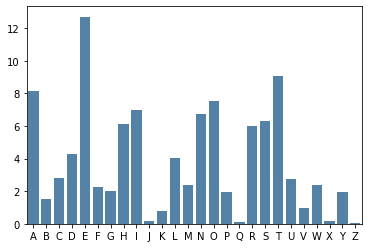

In [5]:
barplot(labels, values, color='steelblue');

There are several observations that will be helpful in our cryptanalysis.
* A and E are both high frequency letters spaced 4 apart from each other
* H and I are relatively high frequency letters adjacent to each other
* N and O are relatively high frequency letters adjacent to each other
* R, S, and T are relatively high frequency letters adjacent to each other
* Most other letters have relatively low frequency, some with very low frequency

Together these traits form somewhat of a "fingerprint" of the English language. If we were to use a cipher that did not alter the relative order in which letters were placed to each other, like the Caesar cipher, then we can find these same peaks and valleys in a ciphertext letter distribution.

For example, take the relatively short ciphertext and its frequency distribution.
> PMOLO HKHUF AOPUN JVUMP KLUAP HSAVZ HFOLD YVALP APUJP WOLYA OHAPZ IFZVJ OHUNP UNAOL VYKLY VMAOL SLAAL YZVMA OLHSW OHILA AOHAU VAHDV YKJVB SKILT HKLVB A

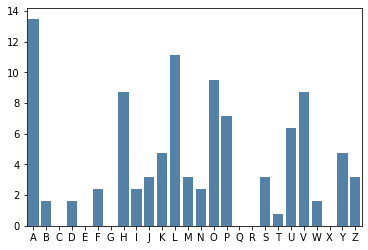

In [6]:
def textClean( text ):
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = text.upper()
    cleaned = ''
    for char in text:
        if char in LETTERS:
            cleaned += char
            
    return cleaned

def letterFrequency(text):
    text = textClean(text)
    frequencyList = []
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for char in LETTERS:
        frequencyList.append( 100 * text.count(char) / len(text))
    
    return frequencyList

values = letterFrequency('PMOLO HKHUF AOPUN JVUMP KLUAP HSAVZ HFOLD YVALP APUJP WOLYA OHAPZ IFZVJ OHUNP UNAOL VYKLY VMAOL SLAAL YZVMA OLHSW OHILA AOHAU VAHDV YKJVB SKILT HKLVB A' )
barplot(labels, values, color='steelblue');

Even with this fairly short piece of text, you can see that H and L in the ciphertext likely correspond to A and E in the plaintext, O and P correspond to H and I, U and V correspond to N and O, and that Y, Z, and A correspond to, R, S, and T. 

If $\text{e} \rightarrow \text{L}$, then it can be deduced that the key to this Caesar cipher was 7, since $\text{L} \rightarrow 11$, $\text{e} \rightarrow 4$, and $11 - 4 = 7$. You could confirm this pattern with any suspected pairing of plaintext and ciphertext letters.

At first glance this process isn't much better than the brute force method. You still need to visually inspect and interpret some information about the ciphertext to determine the key, only it happens to be in barchart form instead of looking for english words in a list of possible plaintexts. We'll see in the next section how we can use the data in the barchart to help create a score for each possible plaintext that we can use to rank our key selection.

## Exercise for the Reader
Can you write a function `character_frequency` that takes in a string of text, cleans it, and returns a list of 26 frequencies in order from A to Z?

## Frequency Analysis for the Affine Cipher

Frequency analysis for the Affine cipher is a bit trickier, since the order of the plaintext alphabet is not preserved in the ciphertext alphabet. As a result, we can't look for the spikes at A/E, H/I, N/O, R/S/T and compute how far apart the two distributions are.

For example, take this relatively long affine ciphertext:

>`KRETI JUKRP TUCHI GRDPT UHUJK XUDET IVVKP RIPER EYPWD KHPWO UPTIJ ULKJJ UDOKP TPTUU RDYIL OIHAY ERDER IINWY AUJJR IHWUP EDHWV EHUYE RDWTI JUOKP TRIPT KRCKR KPPIY KPDIO RIRIH PIUEP KPOEY ETIVV KPTIJ UERDP TEPAU ERYMI ALIHP KPTED EZUHL UMPJW HIGRD DIIHJ KSUEZ IHPTI JUZEK RPUDC HUURO KPTEY TKRWW UJJIO VHEYY SRIVK RPTUU FEMPA KDDJU PTUDI IHIZU RUDIR PIEPG VUYTE ZUDTE JJJKS UEPGR RUJEX UHWMI ALIHP EVJUP GRRUJ OKPTI GPYAI SUOKP TZERU JJUDO EJJYE RDLJI IHYPK JUDER DMEHZ UPUDZ HIXKD UDOKP TZIJK YTUDM TEKHY ERDJI PYERD JIPYI LZUCY LIHTE PYERD MIEPY PTUTI VVKPO EYLIR DILXK YKPIH YPTUP GRRUJ OIGRD IRERD IRCIK RCLEK HJWVG PRIPQ GKPUY PHEKC TPKRP IPTUY KDUIL PTUTK JJPTU TKJJE YEJJP TUZUI ZJULI HAERW AKJUY HIGRD MEJJU DKPER DAERW JKPPJ UHIGR DDIIH YIZUR UDIGP ILKPL KHYPI RIRUY KDUER DPTUR IRERI PTUHR ICIKR CGZYP EKHYL IHPTU TIVVK PVUDH IIAYV EPTHI IAYMU JJEHY ZERPH KUYJI PYILP TUYUO EHDHI VUYTU TEDOT IJUHI IAYDU XIPUD PIMJI PTUYS KPMTU RYDKR KRCHI IAYEJ JOUHU IRPTU YEAUL JIIHE RDKRD UUDIR PTUYE AUZEY YECUP TUVUY PHIIA YOUHU EJJIR PTUJU LPTER DYKDU CIKRC KRLIH PTUYU OUHUP TUIRJ WIRUY PITEX UOKRD IOYDU UZYUP HIGRD OKRDI OYJII SKRCI XUHTK YCEHD URERD AUEDI OYVUW IRDYJ IZKRC DIORP IPTUH KXUH`

Looking at the distribution of characters in the ciphertext message doesn't yield much insight.

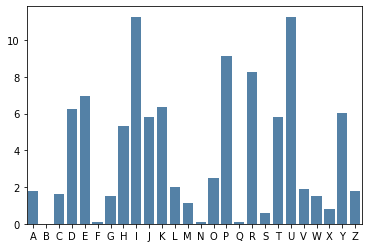

In [7]:
values = letterFrequency('KRETI JUKRP TUCHI GRDPT UHUJK XUDET IVVKP RIPER EYPWD KHPWO UPTIJ ULKJJ UDOKP TPTUU RDYIL OIHAY ERDER IINWY AUJJR IHWUP EDHWV EHUYE RDWTI JUOKP TRIPT KRCKR KPPIY KPDIO RIRIH PIUEP KPOEY ETIVV KPTIJ UERDP TEPAU ERYMI ALIHP KPTED EZUHL UMPJW HIGRD DIIHJ KSUEZ IHPTI JUZEK RPUDC HUURO KPTEY TKRWW UJJIO VHEYY SRIVK RPTUU FEMPA KDDJU PTUDI IHIZU RUDIR PIEPG VUYTE ZUDTE JJJKS UEPGR RUJEX UHWMI ALIHP EVJUP GRRUJ OKPTI GPYAI SUOKP TZERU JJUDO EJJYE RDLJI IHYPK JUDER DMEHZ UPUDZ HIXKD UDOKP TZIJK YTUDM TEKHY ERDJI PYERD JIPYI LZUCY LIHTE PYERD MIEPY PTUTI VVKPO EYLIR DILXK YKPIH YPTUP GRRUJ OIGRD IRERD IRCIK RCLEK HJWVG PRIPQ GKPUY PHEKC TPKRP IPTUY KDUIL PTUTK JJPTU TKJJE YEJJP TUZUI ZJULI HAERW AKJUY HIGRD MEJJU DKPER DAERW JKPPJ UHIGR DDIIH YIZUR UDIGP ILKPL KHYPI RIRUY KDUER DPTUR IRERI PTUHR ICIKR CGZYP EKHYL IHPTU TIVVK PVUDH IIAYV EPTHI IAYMU JJEHY ZERPH KUYJI PYILP TUYUO EHDHI VUYTU TEDOT IJUHI IAYDU XIPUD PIMJI PTUYS KPMTU RYDKR KRCHI IAYEJ JOUHU IRPTU YEAUL JIIHE RDKRD UUDIR PTUYE AUZEY YECUP TUVUY PHIIA YOUHU EJJIR PTUJU LPTER DYKDU CIKRC KRLIH PTUYU OUHUP TUIRJ WIRUY PITEX UOKRD IOYDU UZYUP HIGRD OKRDI OYJII SKRCI XUHTK YCEHD URERD AUEDI OYVUW IRDYJ IZKRC DIORP IPTUH KXUH')
barplot(labels, values, color='steelblue');

We could instead attempt to order the ciphertext letters by frequency and compare to the plaintext alphabet ordered by frequency. For sufficiently long ciphertexts, it would seem reasonable to assume that the most frequent ciphertext letter would correspond to the most frequent plaintext letter, that the second highest frequency ciphertext letter corresponds to the second highest frequency plaintext letter, etc. However, as reasonable as this seems, we'll see that it doesn't often work in practice.

Compare the English language plaintext distribution on the left to the ciphertext distribution on the right.

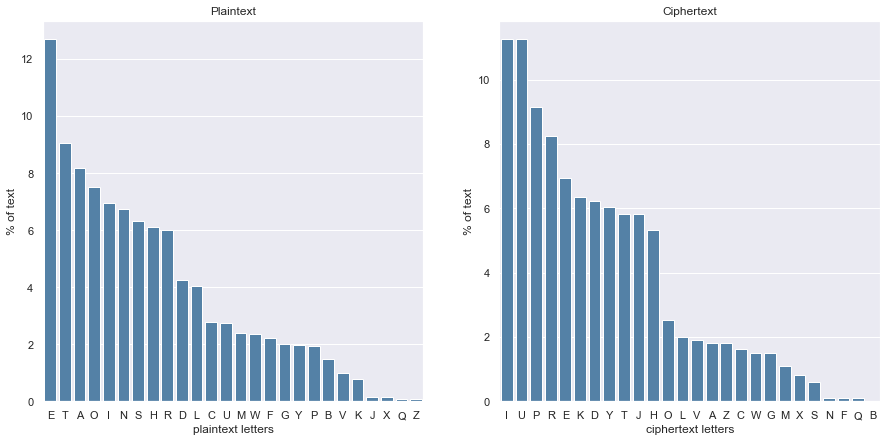

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,7)})
ciphertext = 'KRETIJUKRPTUCHIGRDPTUHUJKXUDETIVVKPRIPEREYPWDKHPWOUPTIJULKJJUDOKPTPTUURDYILOIHAYERDERIINWYAUJJRIHWUPEDHWVEHUYERDWTIJUOKPTRIPTKRCKRKPPIYKPDIORIRIHPIUEPKPOEYETIVVKPTIJUERDPTEPAUERYMIALIHPKPTEDEZUHLUMPJWHIGRDDIIHJKSUEZIHPTIJUZEKRPUDCHUUROKPTEYTKRWWUJJIOVHEYYSRIVKRPTUUFEMPAKDDJUPTUDIIHIZURUDIRPIEPGVUYTEZUDTEJJJKSUEPGRRUJEXUHWMIALIHPEVJUPGRRUJOKPTIGPYAISUOKPTZERUJJUDOEJJYERDLJIIHYPKJUDERDMEHZUPUDZHIXKDUDOKPTZIJKYTUDMTEKHYERDJIPYERDJIPYILZUCYLIHTEPYERDMIEPYPTUTIVVKPOEYLIRDILXKYKPIHYPTUPGRRUJOIGRDIRERDIRCIKRCLEKHJWVGPRIPQGKPUYPHEKCTPKRPIPTUYKDUILPTUTKJJPTUTKJJEYEJJPTUZUIZJULIHAERWAKJUYHIGRDMEJJUDKPERDAERWJKPPJUHIGRDDIIHYIZURUDIGPILKPLKHYPIRIRUYKDUERDPTURIRERIPTUHRICIKRCGZYPEKHYLIHPTUTIVVKPVUDHIIAYVEPTHIIAYMUJJEHYZERPHKUYJIPYILPTUYUOEHDHIVUYTUTEDOTIJUHIIAYDUXIPUDPIMJIPTUYSKPMTURYDKRKRCHIIAYEJJOUHUIRPTUYEAULJIIHERDKRDUUDIRPTUYEAUZEYYECUPTUVUYPHIIAYOUHUEJJIRPTUJULPTERDYKDUCIKRCKRLIHPTUYUOUHUPTUIRJWIRUYPITEXUOKRDIOYDUUZYUPHIGRDOKRDIOYJIISKRCIXUHTKYCEHDURERDAUEDIOYVUWIRDYJIZKRCDIORPIPTUHKXUH'.replace(' ', '')

pvalues = [8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987, 6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074]
pvalues.sort(reverse=True)
plabels = ['E', 'T', 'A', 'O', 'I', 'N', 'S', 'H', 'R', 'D', 'L', 'C', 'U', 'M', 'W', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', 'J', 'X', 'Q', 'Z']

shell = []
for char in plabels:
    shell.append([char, 100*ciphertext.count(char)/len(ciphertext)])

def takeSecond(elem):
    return elem[1]

shell.sort(key=takeSecond, reverse=True)

cvalues = []
clabels = []
for i in shell:
    clabels.append(i[0])
    cvalues.append(i[1])    

fig, ax =plt.subplots(1,2)
ax[0].set_title('Plaintext')
ax[0].set(xlabel='plaintext letters', ylabel='% of text')
ax[1].set_title('Ciphertext')
ax[1].set(xlabel='ciphertext letters', ylabel='% of text')
sns.barplot(plabels, pvalues, color="steelblue", ax=ax[0]);
sns.barplot(clabels, cvalues, color="steelblue", ax=ax[1]);

At first glance, this actually looks pretty good! You can see that the distributions vary slightly but have a similar shape. However, if you were to correspond the letters 1-to-1 in their frequency order ($\text{I} \rightarrow \text{e}$, $\text{U} \rightarrow \text{t}$, etc.) to decipher the message, you would receive the following plaintext:

In [9]:
for i in plabels:
    #print(i, clabels[ plabels.index(i) ].lower())
    ciphertext = ciphertext.replace(i, clabels[ plabels.index(i) ].lower())

print( ciphertext) 

stiuenlstguloyectjgulylnsfljiuexxsgtegitiwgajsygarlguenlhsnnljrsgugulltjwehreypwitjiteekawplnnteyalgijyaxiylwitjauenlrsgutegustostsggewsgjerteteygeligsgriwiuexxsguenlitjguigplitwvepheygsguijiblyhlvgnayectjjeeynsdlibeyguenlbistgljoylltrsguiwustaalnnerxyiwwdtexstgullzivgpsjjnlguljeeyebltljetgeigcxlwuibljuinnnsdligcttlniflyavepheygixnlgcttlnrsguecgwpedlrsgubitlnnljrinnwitjhneeywgsnljitjviyblgljbyefsjljrsgubenswuljvuisywitjnegwitjnegwehblowheyuigwitjveigwguluexxsgriwhetjehfswsgeywgulgcttlnrectjetitjetoestohisynaxcgtegqcsglwgyisougstgegulwsjlehgulusnngulusnniwinngulblebnlheypitapsnlwyectjvinnljsgitjpitansggnlyectjjeeywebltljecgehsghsywgetetlwsjlitjgultetitegulyteoestocbwgisywheyguluexxsgxljyeepwxiguyeepwvlnniywbitgyslwnegwehgulwlriyjyexlwuluijruenlyeepwjlfegljgevnegulwdsgvultwjststoyeepwinnrlyletgulwiplhneeyitjstjlljetgulwiplbiwwiolgulxlwgyeepwrlylinnetgulnlhguitjwsjloestostheygulwlrlylguletnaetlwgeuiflrstjerwjllbwlgyectjrstjerwneedstoeflyuswoiyjltitjplijerwxlaetjwnebstojertgegulysfly


This looks less good! In fact, while there are a few English words that appear, there's nothing close to a coherent message. Why not?

__Directly comparing frequencies individually is very sensitive to errors.__ If a particular letter is under- or over-represented in the ciphertext compared to the expected frequency, not only does it put the letter in the incorrect order in the distribution, it will also alter the order of many other letters in the distribution. For example, suppose the message was discussing a specific topic that caused the ciphertext letter `J` to be show up less than it normally would. This not only puts `J` lower in the distribution, matching it with the wrong plaintext letter, but it also means that several other letters were misordered as a result. If it were actually supposed to fall between ciphertext letters `K` and `D`, that means all the letters between `D` and `J` were incorrectly mapped to the plaintext as well, since they were all shifted up 1 higher than they should have in the list. If you get just a few letters out of order, it throws the whole deciphering process off completely. Look how different the plaintext message is from the ciphertext message.

The actual plaintext message is:
> In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort. It had a perfectly round door like a porthole, painted green, with a shiny yellow brass knob in the exact middle. The door opened on to a tube-shaped hall like a tunnel: a very comfortable tunnel without smoke, with panelled walls, and floors tiled and carpeted, provided with polished chairs, and lots and lots of pegs for hats and coats - the hobbit was fond of visitors. The tunnel wound on and on, going fairly but not quite straight into the side of the hill - The Hill, as all the people for many miles round called it - and many little round doors opened out of it, first on one side and then on another. No going upstairs for the hobbit: bedrooms, bathrooms, cellars, pantries (lots of these), wardrobes (he had whole rooms devoted to clothes), kitchens, dining-rooms, all were on the same floor, and indeed on the same passage. The best rooms were all on the left-hand side (going in), for these were the only ones to have windows, deep-set round windows looking over his garden and meadows beyond, sloping down to the river.

We'll need to do better if we want a chance to automate our cipher cracking process.